[[2.56183470e-04 1.45461736e-03 5.66711043e-03 1.74588472e-02
  4.50516587e-02]
 [3.76940965e-04 2.08377489e-03 7.88695716e-03 2.35399837e-02
  5.86293697e-02]
 [5.51714864e-04 2.96901781e-03 1.09156754e-02 3.15583000e-02
  7.58483967e-02]
 [8.01216066e-04 4.19588715e-03 1.49786781e-02 4.19281001e-02
  9.71899072e-02]
 [1.15311660e-03 5.87359613e-03 2.03472413e-02 5.51048284e-02
  1.23080899e-01]
 [1.64382706e-03 8.13893182e-03 2.73391696e-02 7.15653845e-02
  1.53831233e-01]
 [2.32055909e-03 1.11600069e-02 3.63163649e-02 9.17795039e-02
  1.89559853e-01]
 [3.24364379e-03 1.51394491e-02 4.76780810e-02 1.16171080e-01
  2.30113236e-01]
 [4.48904553e-03 2.03165046e-02 6.18486348e-02 1.45069151e-01
  2.74981547e-01]
 [6.15097107e-03 2.69674234e-02 7.92584568e-02 1.78649424e-01
  3.23220535e-01]
 [8.34442598e-03 3.54034079e-02 1.00317630e-01 2.16868656e-01
  3.73389573e-01]
 [1.12075190e-02 4.59653552e-02 1.25381539e-01 2.59395931e-01
  4.23517969e-01]
 [1.49032591e-02 5.90146385e-02 1.547089

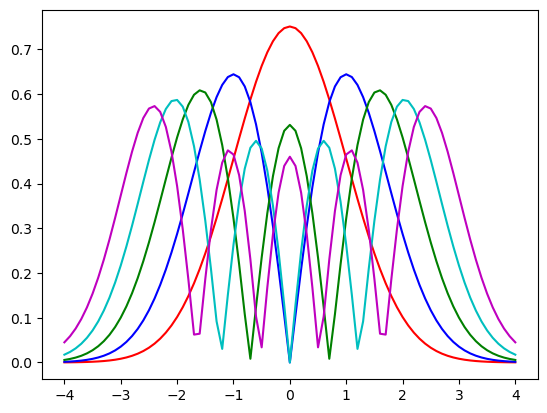

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

tol = 10e-6
L = 4 
xspan = np.arange(-L, L + 0.1, 0.1)
eps_start = 0.1

col = ['r', 'b', 'g', 'c', 'm', 'k'] # eigenfunc colors

eigenvalues = []
eigenfunctions = []

def RHS(y, x, En):
    return [y[1], (x**2 - En) * y[0]]

for modes in range(1, 6): # begin mode loop
    epsilon = eps_start # initial value of epsilon
    d_eps = 0.2 # default step size of epsilon
    
    for _ in range(1000): # begin convergence loop for epsilon
        Y0 = [1, np.sqrt(L**2 - epsilon)]
        
        y = odeint(RHS, Y0, xspan, args=(epsilon,)) 
        
        if abs(y[-1, 1] + np.sqrt(L**2 - epsilon) * y[-1, 0]) < tol: # check for convergence
            eigenvalues.append(epsilon)
            break # get out of convergence loop
            
        if ((-1) ** (modes + 1) * (y[-1, 1] + np.sqrt(L**2 - epsilon) * y[-1, 0])) > 0:
            epsilon += d_eps
        else:
            epsilon -= d_eps
            d_eps = d_eps / 2
    eps_start = epsilon + 0.1 # after finding eigenvalue, pick new start
    norm = np.trapz(y[:, 0] * y[:, 0], xspan) # calculate the normalization
    func = np.abs(y[:, 0]/ np.sqrt(norm))
    
    eigenfunctions.append(func)
    
    plt.plot(xspan, func, col[modes - 1]) 

A2 = eigenvalues
A1 = eigenfunctions
A1 = np.array(A1).T
print(A1)
print(A2)
# A2 = 81 * 5 matrix


[[2.56180384e-04 1.45460555e-03 5.66708286e-03 1.74588182e-02
  4.50517395e-02]
 [3.76936594e-04 2.08375912e-03 7.88692360e-03 2.35399564e-02
  5.86294710e-02]
 [5.51708963e-04 2.96899812e-03 1.09156350e-02 3.15582653e-02
  7.58485956e-02]
 [8.01208357e-04 4.19586166e-03 1.49786282e-02 4.19281051e-02
  9.71902716e-02]
 [1.15310612e-03 5.87356133e-03 2.03471892e-02 5.51048341e-02
  1.23081235e-01]
 [1.64381210e-03 8.13888867e-03 2.73391058e-02 7.15654259e-02
  1.53832042e-01]
 [2.32053904e-03 1.11599550e-02 3.63162920e-02 9.17796590e-02
  1.89560569e-01]
 [3.24361797e-03 1.51393811e-02 4.76780307e-02 1.16171144e-01
  2.30114712e-01]
 [4.48901305e-03 2.03164247e-02 6.18485223e-02 1.45069568e-01
  2.74983138e-01]
 [6.15092708e-03 2.69673294e-02 7.92584236e-02 1.78649655e-01
  3.23223127e-01]
 [8.34436979e-03 3.54032825e-02 1.00317514e-01 2.16869468e-01
  3.73392358e-01]
 [1.12074500e-02 4.59652381e-02 1.25381554e-01 2.59396719e-01
  4.23521624e-01]
 [1.49031688e-02 5.90144517e-02 1.547088

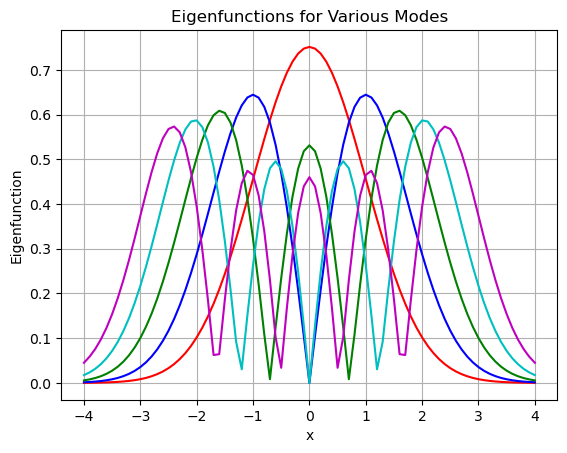

In [6]:
# Part A2

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

tol = 10e-6
L = 4 
xspan = np.arange(-L, L + 0.1, 0.1)
eps_start = 0.1

col = ['r', 'b', 'g', 'c', 'm', 'k']  # eigenfunction colors

eigenvalues = []
eigenfunctions = []

def RHS(x, y, En):
    return [y[1], (x**2 - En) * y[0]]

for modes in range(1, 6):  # begin mode loop
    epsilon = eps_start  # initial value of epsilon
    d_eps = 0.2  # default step size of epsilon
    
    for _ in range(1000):  # begin convergence loop for epsilon
        Y0 = [1, np.sqrt(L**2 - epsilon)]
        
        # Solve the ODE with solve_ivp
        sol = solve_ivp(RHS, (xspan[0], xspan[-1]), Y0, args=(epsilon,), t_eval=xspan, rtol=tol, atol=tol)
        y = sol.y
        
        # Check for convergence
        if abs(y[1, -1] + np.sqrt(L**2 - epsilon) * y[0, -1]) < tol:
            eigenvalues.append(epsilon)
            break  # Exit the convergence loop
        
        # Adjust epsilon based on boundary condition behavior
        if ((-1) ** (modes + 1) * (y[1, -1] + np.sqrt(L**2 - epsilon) * y[0, -1])) > 0:
            epsilon += d_eps
        else:
            epsilon -= d_eps
            d_eps = d_eps / 2

    eps_start = epsilon + 0.1  # After finding eigenvalue, pick new start

    # Normalize the eigenfunction
    norm = np.trapz(y[0, :] ** 2, xspan)
    func = np.abs(y[0, :] / np.sqrt(norm))
    
    eigenfunctions.append(func)
    
    # Plot the eigenfunction
    plt.plot(xspan, func, col[modes - 1])

# Output the eigenfunctions and eigenvalues
A2 = eigenvalues
A1 = eigenfunctions
A1 = np.array(A1).T
print(A1)
print(A2)

plt.xlabel('x')
plt.ylabel('Eigenfunction')
plt.title('Eigenfunctions for Various Modes')
plt.grid(True)
plt.show()
